In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import mahotas as mh

In [3]:
DATA_DIR = '/raid/mpsych/RISTERLAB/VSOverviewTileSet/Acquired'

In [4]:
z = 602
img = '000000_000000_000'+str(z)+'_000000.tif'

In [5]:
z_img = mh.imread(os.path.join(DATA_DIR,img))

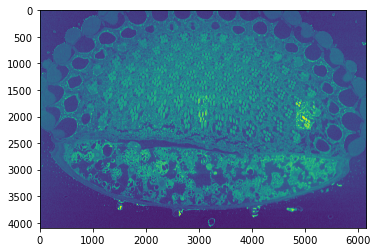

In [6]:
imshow(z_img)

In [7]:
z_img_cropped = z_img.copy()[1500:2000, 2500:4000]

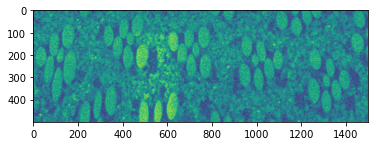

In [8]:
imshow(z_img_cropped)

In [9]:
# contrast enhancement using min-max contrast stretching
# https://iq.opengenus.org/contrast-enhancement-algorithms/

# Create an empty array to store the final output
image_cs = np.zeros((z_img_cropped.shape[0],z_img_cropped.shape[1]),dtype = 'uint8')
 

# Apply Min-Max Contrasting
min = np.min(z_img_cropped)
max = np.max(z_img_cropped)

for i in range(z_img_cropped.shape[0]):
    for j in range(z_img_cropped.shape[1]):
        image_cs[i,j] = 255*(z_img_cropped[i,j]-min)/(max-min)


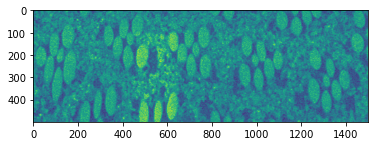

In [10]:
imshow(image_cs)

<Figure size 432x288 with 0 Axes>

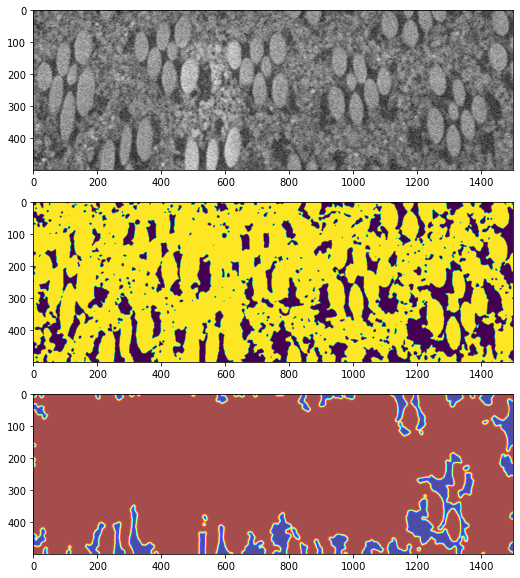

In [14]:
plt.figure()
f, plot = plt.subplots(3, figsize=(10, 10))
# enhance contrast apply gaussian filter
b = image_cs.copy()
b = mh.stretch_rgb(b)
b = mh.gaussian_filter(b, sigma=3)

# filter by value
b[b<100] = 0 # Could be played around with later

# label regions
labeled, number  = mh.label(b)

# filter based on labeled region size
sizes = mh.labeled.labeled_size(labeled)
too_small = np.where(sizes < 1000)
labeled_only_big = mh.labeled.remove_regions(labeled, too_small)

# create binary mask - foreground and background
binary_mask = labeled_only_big.copy()
binary_mask[binary_mask > 0] = 1
plot[1].imshow(binary_mask)

# close holes in binary mask
binary_mask_closed_holes = mh.morph.close_holes(binary_mask)

# close region in binary mask
binary_mask_closed = mh.morph.close(binary_mask_closed_holes)

# dilate and erode to fill further holes
for i in range(4):
    binary_mask_closed = mh.morph.dilate(binary_mask_closed)
for i in range(4):
    binary_mask_closed = mh.morph.erode(binary_mask_closed)

# apply gaussian filter on close region binary mask
binary_mask_closed_filtered = mh.gaussian_filter(binary_mask_closed, sigma=3)

# show images
plot[0].imshow(image_cs, cmap='gray')
plot[2].imshow(binary_mask_closed_filtered, 'jet', interpolation='none', alpha=0.7)